In [93]:
import requests
import numpy as np
import os
import glob
import urllib.request
import pandas as pd
import csv
import io
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [94]:
tb_epl=pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')

In [95]:
tb_epl

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Youri Tielemans,24,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
566,Yves Bissouma,25,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
567,Zechariah Medley,21,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
568,Zeze Steven Sessegnon,21,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


DATA CLEANING

In [96]:
tb_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       570 non-null    object 
 1   age                             570 non-null    int64  
 2   birthday                        570 non-null    int64  
 3   birthday_GMT                    570 non-null    object 
 4   league                          570 non-null    object 
 5   season                          570 non-null    object 
 6   position                        570 non-null    object 
 7   Current Club                    570 non-null    object 
 8   minutes_played_overall          570 non-null    int64  
 9   minutes_played_home             570 non-null    int64  
 10  minutes_played_away             570 non-null    int64  
 11  nationality                     570 non-null    object 
 12  appearances_overall             570 

In [97]:
tb_epl.describe()

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,570.000000,5.700000e+02,570.000000,570.00000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,28.952632,7.123348e+08,1317.577193,658.95614,658.621053,18.380702,9.184211,9.196491,1.824561,1.008772,...,1.210386,63.638596,56.487719,475.163158,464.422807,0.140263,154.103509,154.103509,26.324561,11.277193
std,4.359851,1.380632e+08,1096.272614,557.48134,549.122038,12.863375,6.525286,6.491307,3.478899,2.151942,...,0.952720,48.089868,30.684299,610.579856,733.732082,0.232726,139.492697,139.492697,49.730291,8.456464
min,20.000000,2.958336e+08,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,26.000000,6.190992e+08,212.250000,90.00000,102.000000,6.000000,3.000000,3.000000,0.000000,0.000000,...,0.682500,40.000000,35.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,4.000000
50%,29.000000,7.074432e+08,1115.500000,540.00000,565.000000,19.000000,10.000000,9.500000,0.000000,0.000000,...,1.210000,63.000000,67.000000,332.000000,0.000000,0.100000,134.500000,134.500000,-1.000000,11.000000
75%,32.000000,8.168040e+08,2185.500000,1126.75000,1121.500000,30.000000,15.000000,15.000000,2.000000,1.000000,...,1.580000,80.000000,83.000000,676.250000,682.500000,0.200000,276.750000,276.750000,32.750000,18.000000
max,42.000000,1.001894e+09,3420.000000,1710.00000,1710.000000,38.000000,19.000000,19.000000,22.000000,18.000000,...,8.570000,353.000000,90.000000,3420.000000,3420.000000,4.090000,419.000000,419.000000,175.000000,31.000000


In [98]:
tb_epl.size

26790

In [99]:
tb_epl.astype

<bound method NDFrame.astype of                  full_name  age   birthday birthday_GMT          league  \
0          Aaron Cresswell   32  629683200   1989/12/15  Premier League   
1             Aaron Lennon   34  545529600   1987/04/16  Premier League   
2               Aaron Mooy   31  653356800   1990/09/15  Premier League   
3             Aaron Ramsey   31  662169600   1990/12/26  Premier League   
4               Aaron Rowe   21  968284800   2000/09/07  Premier League   
..                     ...  ...        ...          ...             ...   
565        Youri Tielemans   24  862963200   1997/05/07  Premier League   
566          Yves Bissouma   25  841363200   1996/08/30  Premier League   
567       Zechariah Medley   21  962928000   2000/07/07  Premier League   
568  Zeze Steven Sessegnon   21  958608000   2000/05/18  Premier League   
569       Łukasz Fabiański   36  482630400   1985/04/18  Premier League   

        season    position            Current Club  minutes_played_

In [100]:
tb_epl.isna().sum()

full_name                         0
age                               0
birthday                          0
birthday_GMT                      0
league                            0
season                            0
position                          0
Current Club                      0
minutes_played_overall            0
minutes_played_home               0
minutes_played_away               0
nationality                       0
appearances_overall               0
appearances_home                  0
appearances_away                  0
goals_overall                     0
goals_home                        0
goals_away                        0
assists_overall                   0
assists_home                      0
assists_away                      0
penalty_goals                     0
penalty_misses                    0
clean_sheets_overall              0
clean_sheets_home                 0
clean_sheets_away                 0
conceded_overall                  0
conceded_home               

In [101]:
tb_epl['goals_overall'].sum()

1040

In [102]:
age=tb_epl.filter(items=['age'])

In [103]:
club=tb_epl.filter(items=['Current Club'])

In [104]:
club

,Current Club
0,West Ham United
1,Burnley
2,Huddersfield Town
3,Arsenal
4,Huddersfield Town
...,...
565,Leicester City
566,Brighton & Hove Albion
567,Arsenal
568,Fulham


In [105]:
penalty_misses=tb_epl['penalty_misses'].sum()

PIE CHART FOR PENALTY MISSED VS PENALTY GOALS

In [106]:
penalty_misses

19

In [107]:
total_penalty_goals = tb_epl['penalty_goals'].sum()
print(total_penalty_goals)


84


In [108]:
penalty_attempts=penalty_misses+total_penalty_goals
print(penalty_attempts)

103


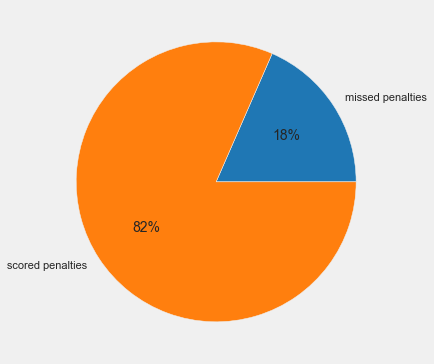

In [109]:
plt.figure(figsize=(13,6))
data=[penalty_misses,total_penalty_goals]
labels=['missed penalties', 'scored penalties']
color=sns.color_palette("tab10")
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

In [110]:
tb_epl['position'].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [111]:
tb_epl['nationality'].unique()

array(['England', 'Australia', 'Wales', 'Morocco', 'France', 'Venezuela',
       'Italy', 'Spain', 'Jamaica', 'Portugal', 'Serbia', 'Nigeria',
       'Norway', 'Chile', 'Iran', 'Brazil', 'Germany', 'Cameroon',
       'Denmark', 'Scotland', 'Ukraine', 'Ecuador', 'Montenegro',
       'Iceland', 'Poland', 'Bosnia and Herzegovina', 'Mali', 'Israel',
       'Republic of Ireland', 'Gabon', 'Turkey', 'Colombia', 'Senegal',
       'New Zealand', 'Ghana', 'Belgium', 'Austria', 'Northern Ireland',
       'Argentina', 'USA', 'Netherlands', 'Canada', 'Croatia', 'Congo DR',
       "Côte d'Ivoire", 'Paraguay', 'Switzerland', 'Romania', 'Togo',
       'Armenia', 'South Korea', 'Mexico', 'Slovenia', 'Greece', 'Sweden',
       'Curaçao', 'Uruguay', 'Slovakia', 'Czech Republic', 'Japan',
       'Egypt', 'Guinea', 'Philippines', 'Equatorial Guinea', 'Algeria',
       'Benin', 'Kenya'], dtype=object)

In [112]:
tb_epl[tb_epl['nationality']=='Nigeria']

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
22,Alex Iwobi,25,831081600,1996/05/03,Premier League,2018/2019,Forward,Arsenal,1972,742,...,1.41,64,56,0,329,0.00,128,31,-1,8
229,Isaac Ajayi Success,26,820972800,1996/01/07,Premier League,2018/2019,Forward,Watford,1037,461,...,1.74,52,35,259,1037,0.35,181,154,-1,10
315,Kelechi Iheanacho,25,844300800,1996/10/03,Premier League,2018/2019,Forward,Leicester City,926,408,...,1.07,84,31,463,309,0.19,169,24,-1,13
339,Leon Balogun,33,583459200,1988/06/28,Premier League,2018/2019,Defender,Brighton & Hove Albion,591,309,...,1.37,66,74,296,0,0.30,121,292,97,12
433,Onyinye Wilfred Ndidi,25,850694400,1996/12/16,Premier League,2018/2019,Midfielder,Leicester City,3299,1624,...,1.15,79,87,412,0,0.22,218,332,-1,9
545,Victor Moses,31,660960000,1990/12/12,Premier League,2018/2019,Midfielder,Chelsea,26,17,...,3.46,26,13,0,0,0.00,-1,-1,-1,23


In [113]:
tb_epl[tb_epl['age']==25]

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
6,Abdelhamid Sabiri,25,849139200,1996/11/28,Premier League,2018/2019,Midfielder,Huddersfield Town,49,0,...,5.51,16,25,0,0,0.00,-1,-1,-1,22
13,Adama Diakhaby,25,836524800,1996/07/05,Premier League,2018/2019,Forward,Huddersfield Town,551,345,...,2.61,34,46,551,0,0.16,332,359,-1,26
14,Adama Traoré Diarra,25,822528000,1996/01/25,Premier League,2018/2019,Midfielder,Wolverhampton Wanderers,890,315,...,1.11,81,31,890,890,0.10,160,152,-1,13
22,Alex Iwobi,25,831081600,1996/05/03,Premier League,2018/2019,Forward,Arsenal,1972,742,...,1.41,64,56,0,329,0.00,128,31,-1,8
43,Andreas Christensen,25,829094400,1996/04/10,Premier League,2018/2019,Defender,Chelsea,615,360,...,1.02,88,77,615,0,0.15,338,346,35,21
52,Angus Gunn,25,822268800,1996/01/22,Premier League,2018/2019,Goalkeeper,Southampton,1080,540,...,1.42,64,90,0,0,0.00,376,339,104,25
70,Ben Chilwell,25,851126400,1996/12/21,Premier League,2018/2019,Defender,Leicester City,3240,1620,...,1.08,83,90,810,810,0.11,344,139,44,16
90,Caglar Söyüncü,25,832809600,1996/05/23,Premier League,2018/2019,Defender,Leicester City,371,191,...,0.73,124,62,371,0,0.24,267,330,16,20
150,Davinson Sánchez Mina,25,834537600,1996/06/12,Premier League,2018/2019,Defender,Tottenham Hotspur,1943,873,...,0.97,93,84,972,1943,0.09,221,208,26,13
155,Dele Alli,25,829180800,1996/04/11,Premier League,2018/2019,Midfielder,Tottenham Hotspur,1827,755,...,0.84,107,73,457,609,0.20,82,97,-1,5


In [114]:
np.size((tb_epl['nationality'].unique()))

67

<AxesSubplot:xlabel='nationality'>

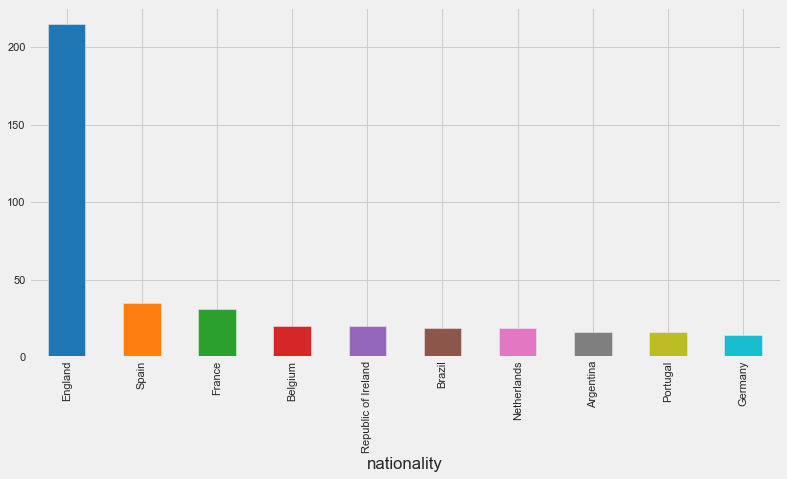

In [115]:
nationality=tb_epl.groupby('nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette("tab10"))

<AxesSubplot:>

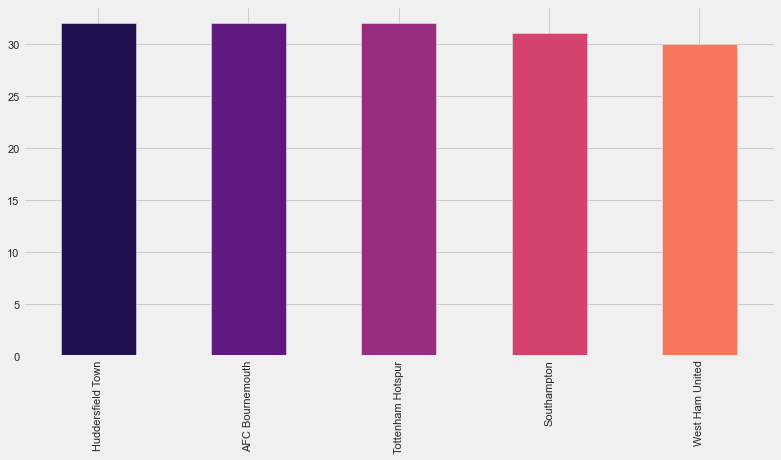

In [116]:
tb_epl['Current Club'].value_counts().nlargest(5).plot(kind='bar', figsize=(12,6), color=sns.color_palette("magma"))

In [117]:
Huddeer

NameError: name 'Huddeer' is not defined

<AxesSubplot:>

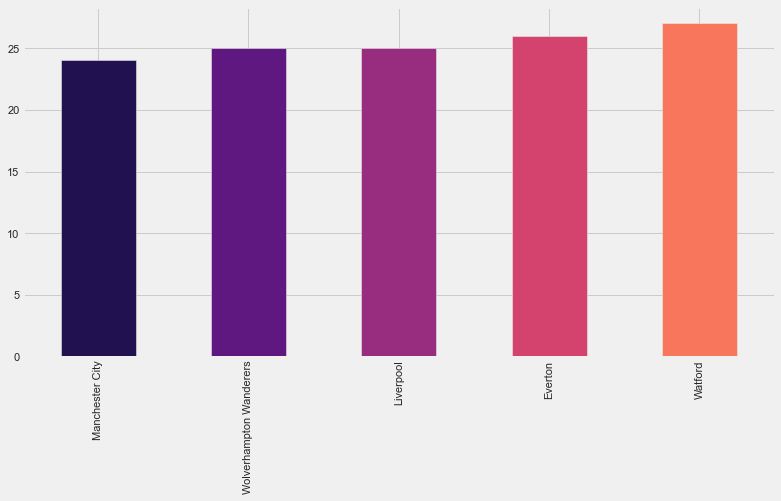

In [118]:
tb_epl['Current Club'].value_counts().nsmallest(5).plot(kind='bar', figsize=(12,6), color=sns.color_palette("magma"))

In [119]:
under20=tb_epl[tb_epl['age']<=20]
under35=tb_epl[(tb_epl['age']>25) & (tb_epl['age']<=35)]
above35=tb_epl[(tb_epl['age'])&(tb_epl['age']<=35)]

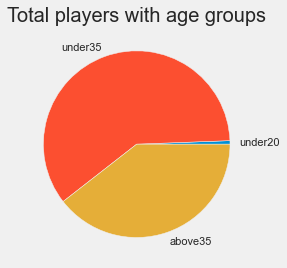

In [120]:
x=np.array([under20['full_name'].count(), under35['full_name'].count(), above35['full_name'].count()])
labels= ['under20','under35','above35']
plt.title('Total players with age groups', fontsize=20)
plt.pie(x,labels=labels)
plt.show()

In [121]:
Total_under20_players=under20=tb_epl[tb_epl['age']<=20]

<AxesSubplot:>

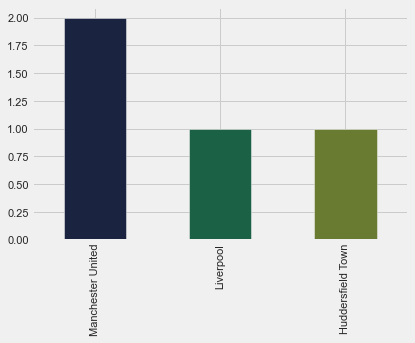

In [122]:
Total_under20_players['Current Club'].value_counts().plot(kind= 'bar', color=sns.color_palette("cubehelix"))

In [123]:
Total_under20_players[Total_under20_players['Current Club']=='Manchester United']

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
241,James Garner,20,984441600,2001/03/13,Premier League,2018/2019,Defender,Manchester United,0,0,...,0.00,0,0,0,0,0.0,-1,-1,-1,-1
378,Mason Greenwood,20,1001894400,2001/10/01,Premier League,2018/2019,Midfielder,Manchester United,115,105,...,1.57,58,38,0,0,0.0,-1,-1,-1,27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'West Ham United'),
  Text(1, 0, 'Burnley'),
  Text(2, 0, 'Huddersfield Town'),
  Text(3, 0, 'Arsenal'),
  Text(4, 0, 'Crystal Palace'),
  Text(5, 0, 'Watford'),
  Text(6, 0, 'Fulham'),
  Text(7, 0, 'Liverpool'),
  Text(8, 0, 'AFC Bournemouth'),
  Text(9, 0, 'Wolverhampton Wanderers'),
  Text(10, 0, 'Everton'),
  Text(11, 0, 'Leicester City'),
  Text(12, 0, 'Southampton'),
  Text(13, 0, 'Cardiff City'),
  Text(14, 0, 'Manchester United'),
  Text(15, 0, 'Tottenham Hotspur'),
  Text(16, 0, 'Brighton & Hove Albion'),
  Text(17, 0, 'Chelsea'),
  Text(18, 0, 'Newcastle United'),
  Text(19, 0, 'Manchester City')])

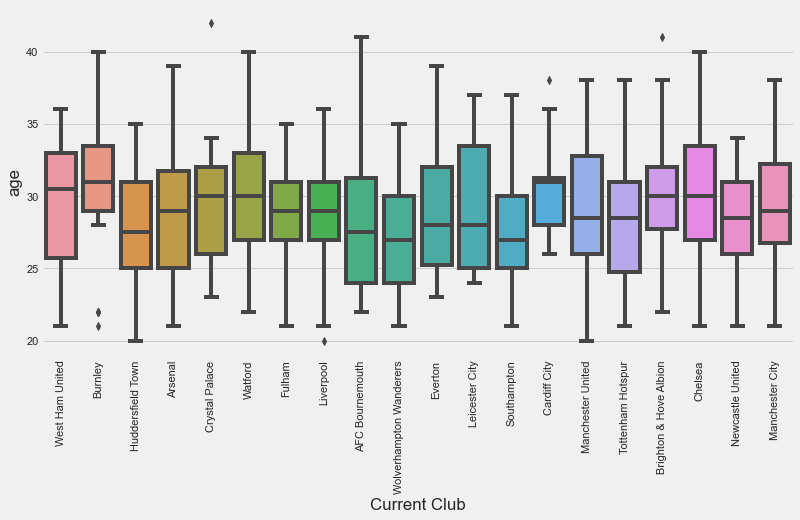

In [124]:
 #average age of players in the club
plt.figure(figsize=(12,6))
sns.boxplot(data=tb_epl, x='Current Club', y='age')
plt.xticks(rotation=90)

In the boxplot above,We have two outliers in Bunley club with ages below 25, Crystal palace has an outlier of age above 40. In liverpool, we have a player with 20 years of age. We also have outliers in Cardiff city and Hove Albion.

In [125]:
num_of_players=tb_epl.groupby("Current Club").size()
data=(tb_epl.groupby("Current Club")["age"].sum())/num_of_players
data.sort_values(ascending=False)

Current Club
Burnley                    30.666667
Cardiff City               30.571429
Watford                    30.370370
Chelsea                    29.777778
West Ham United            29.600000
Brighton & Hove Albion     29.571429
Crystal Palace             29.533333
Manchester City            29.208333
Leicester City             29.000000
Everton                    28.961538
Manchester United          28.766667
Fulham                     28.724138
Liverpool                  28.600000
Arsenal                    28.566667
AFC Bournemouth            28.468750
Newcastle United           28.266667
Tottenham Hotspur          28.187500
Huddersfield Town          27.812500
Southampton                27.677419
Wolverhampton Wanderers    27.160000
dtype: float64

In [126]:
tb_epl.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [127]:
assists_by_clubs=pd.DataFrame(tb_epl.groupby('Current Club',as_index='False')['assists_overall'].sum())


In [128]:
sns.set_theme(style='whitegrid', color_codes=True)

In [135]:
sns.barplot(x='Current Club',data=assists_by_clubs.sort_values(by='assists_overall'))

ValueError: Could not interpret input 'Current Club'